# **Import all modules needed**

In [34]:
!pip install fastapi pydantic uvicorn joblib

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import joblib
import json
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel, Field, model_validator
from fastapi.middleware.cors import CORSMiddleware
import uvicorn

# **Problem Statement**

**The objective of this project is to predict student final math grades (G3) using various academic, demographic, and social factors (other columns in the dataset) based on the student-mat.csv dataset. This will allow educators and parents to identify students at risk of underperforming and provide them with timely support and interventions, ultimately aiming to improve student outcomes in mathematics.**

I aim to build models that can take various student attributes (academic, demographic, and social factors) as input and accurately estimate the corresponding final math grade (G3) as output.

I will explore different techiques like;

* **Linear Regression:** Assuming a linear relationship between student attributes (academic, demographic, and social factors) and final math grade (G3).

* **Decision Trees:** To capture potential non-linear relationships and feature interactions among student attributes that influence final grade.

* **Random Forests:** s an ensemble method to improve prediction accuracy and robustness in predicting final math grade based on multiple student characteristics.

By comparing the performance of these models (Linear Regression, Decision Trees, and Random Forests), I aim to identify the most effective approach for predicting student final math grades (G3) based on various student attributes (academic, demographic, and social factors).


## **Importance of Clearly Defining the Problem**

Clearly defining the problem is crucial for several reasons:

1.  **Clarity and Focus:** A well-defined problem statement provides clarity and focus to the analysis, guiding the subsequent steps and choices made in data preprocessing, model selection, and evaluation. This ensures that the analysis remains aligned with the intended goals.

2.  **Model Selection:** Understanding the problem helps in choosing the appropriate model and evaluation metrics. Different problems require different modeling approaches, and a clear problem definition guides these decisions.

3.  **Communication:** A clear problem statement facilitates effective communication of the purpose and findings of the analysis to others. It ensures that everyone involved understands the goals and outcomes of the project, promoting transparency and collaboration.

By explicitly stating the problem, a clear direction is established for the analysis, laying the foundation for a successful and impactful outcome.

## **READING CSV DATA**


In [36]:
math_data = pd.read_csv('/content/student-mat.csv')
math_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## **Checking Data Types of Columns, shape of the dataframe and statistical description of the dataset**

In [37]:
math_data.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


In [38]:
math_data.shape

(395, 33)

In [39]:
math_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [40]:
for column in math_data.columns:
    unique_values = math_data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'school': ['GP' 'MS']
Unique values in column 'sex': ['F' 'M']
Unique values in column 'age': [18 17 15 16 19 22 20 21]
Unique values in column 'address': ['U' 'R']
Unique values in column 'famsize': ['GT3' 'LE3']
Unique values in column 'Pstatus': ['A' 'T']
Unique values in column 'Medu': [4 1 3 2 0]
Unique values in column 'Fedu': [4 1 2 3 0]
Unique values in column 'Mjob': ['at_home' 'health' 'other' 'services' 'teacher']
Unique values in column 'Fjob': ['teacher' 'other' 'services' 'health' 'at_home']
Unique values in column 'reason': ['course' 'other' 'home' 'reputation']
Unique values in column 'guardian': ['mother' 'father' 'other']
Unique values in column 'traveltime': [2 1 3 4]
Unique values in column 'studytime': [2 3 1 4]
Unique values in column 'failures': [0 3 2 1]
Unique values in column 'schoolsup': ['yes' 'no']
Unique values in column 'famsup': ['no' 'yes']
Unique values in column 'paid': ['no' 'yes']
Unique values in column 'activities': ['no' '

## **Analyzing Numerical Columns in student-math.csv**

### 1. `age`
- **Mean**: 16.7  
- **Std Dev**: 1.28  
- **Min**: 15  
- **Max**: 22  
- **Insights**: Most students are between 16 and 18 years old, as indicated by the 25th, 50th, and 75th percentiles. Outliers may exist beyond 18.

### 2. `Medu` (Mother's Education Level)
- **Mean**: 2.75  
- **Std Dev**: 1.09  
- **Range**: 0–4  
- **Insights**: On average, mothers have mid-level education (2-3), but a portion of students' mothers have no formal education (`Min=0`).

### 3. `Fedu` (Father's Education Level)
- **Mean**: 2.52  
- **Std Dev**: 1.09  
- **Range**: 0–4  
- **Insights**: Similar to mothers, fathers also show mid-level education. A slightly lower mean suggests fathers are slightly less educated on average.

### 4. `traveltime` (Time to School)
- **Mean**: 1.45  
- **Std Dev**: 0.70  
- **Range**: 1–4  
- **Insights**: Most students live very close to school (`Median=1`), but a few have significantly longer commutes.

### 5. `studytime` (Weekly Study Time)
- **Mean**: 2.04  
- **Std Dev**: 0.84  
- **Range**: 1–4  
- **Insights**: Majority of students spend 1-2 hours studying weekly, indicating limited dedicated study time.

### 6. `failures` (Number of Past Failures)
- **Mean**: 0.33  
- **Std Dev**: 0.74  
- **Range**: 0–3  
- **Insights**: A majority have no past failures, but the distribution shows a few with repeated failures.

### 7. `famrel` (Family Relationship Quality)
- **Mean**: 3.94  
- **Std Dev**: 0.90  
- **Range**: 1–5  
- **Insights**: Most students report good family relationships (`Median=4`), but some face significant challenges.

### 8. `freetime`
- **Mean**: 3.24  
- **Std Dev**: 1.00  
- **Range**: 1–5  
- **Insights**: Students generally have moderate free time, with few extremes.

### 9. `goout` (Frequency of Going Out)
- **Mean**: 3.11  
- **Std Dev**: 1.11  
- **Range**: 1–5  
- **Insights**: A balanced social life is indicated by the average. However, some students are highly social, while others rarely go out.

### 10. `Dalc` (Workday Alcohol Consumption)
- **Mean**: 1.48  
- **Std Dev**: 0.89  
- **Range**: 1–5  
- **Insights**: Most students have minimal alcohol consumption on workdays (`Median=1`), but a few exhibit high consumption.

### 11. `Walc` (Weekend Alcohol Consumption)
- **Mean**: 2.29  
- **Std Dev**: 1.29  
- **Range**: 1–5  
- **Insights**: Weekend alcohol consumption is higher than on workdays, with a notable portion of students in the higher range.

### 12. `health` (Current Health Status)
- **Mean**: 3.55  
- **Std Dev**: 1.39  
- **Range**: 1–5  
- **Insights**: Overall health is good, but a portion of students report lower health statuses.

### 13. `absences`
- **Mean**: 5.71  
- **Std Dev**: 8.00  
- **Range**: 0–75  
- **Insights**: Most students have few absences (`Median=4`), but some have extreme values (e.g., 75 absences), which may skew the average.

### 14. `G1` (First Period Grade)
- **Mean**: 10.91  
- **Std Dev**: 3.32  
- **Range**: 3–19  
- **Insights**: Grades show a fairly wide distribution, with most students scoring around 8-13.

### 15. `G2` (Second Period Grade)
- **Mean**: 10.71  
- **Std Dev**: 3.76  
- **Range**: 0–19  
- **Insights**: Similar distribution to `G1`, with a slightly lower average and some students scoring zero.

### 16. `G3` (Final Grade)
- **Mean**: 10.42  
- **Std Dev**: 4.58  
- **Range**: 0–20  
- **Insights**: Final grades show the widest spread. While most students achieve average scores, some excel or perform poorly.

---

### General Observations
- Grades (`G1`, `G2`, `G3`) show progressive variability, indicating potential influence from other factors like attendance or study habits.  
- Social behaviors (`goout`, `Dalc`, `Walc`) and their relationship with grades or health could provide valuable insights for further analysis.  
- Extreme values (e.g., in `absences` or `health`) merit investigation as potential outliers.


## **Step 1: One-hot Encoding Categorical Features**

In [41]:
# Select categorical columns (object type)
categorical_cols = math_data.select_dtypes(include=['object']).columns
# Perform one-hot encoding
math_data_encoded = pd.get_dummies(math_data, columns=categorical_cols, drop_first=True)

# Convert boolean columns to integers (0 and 1)
for col in math_data_encoded.select_dtypes(include=['bool']).columns:
    math_data_encoded[col] = math_data_encoded[col].astype(int)
math_data_encoded.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


## **Correlation Matrix for Identifying Linear Dependence**

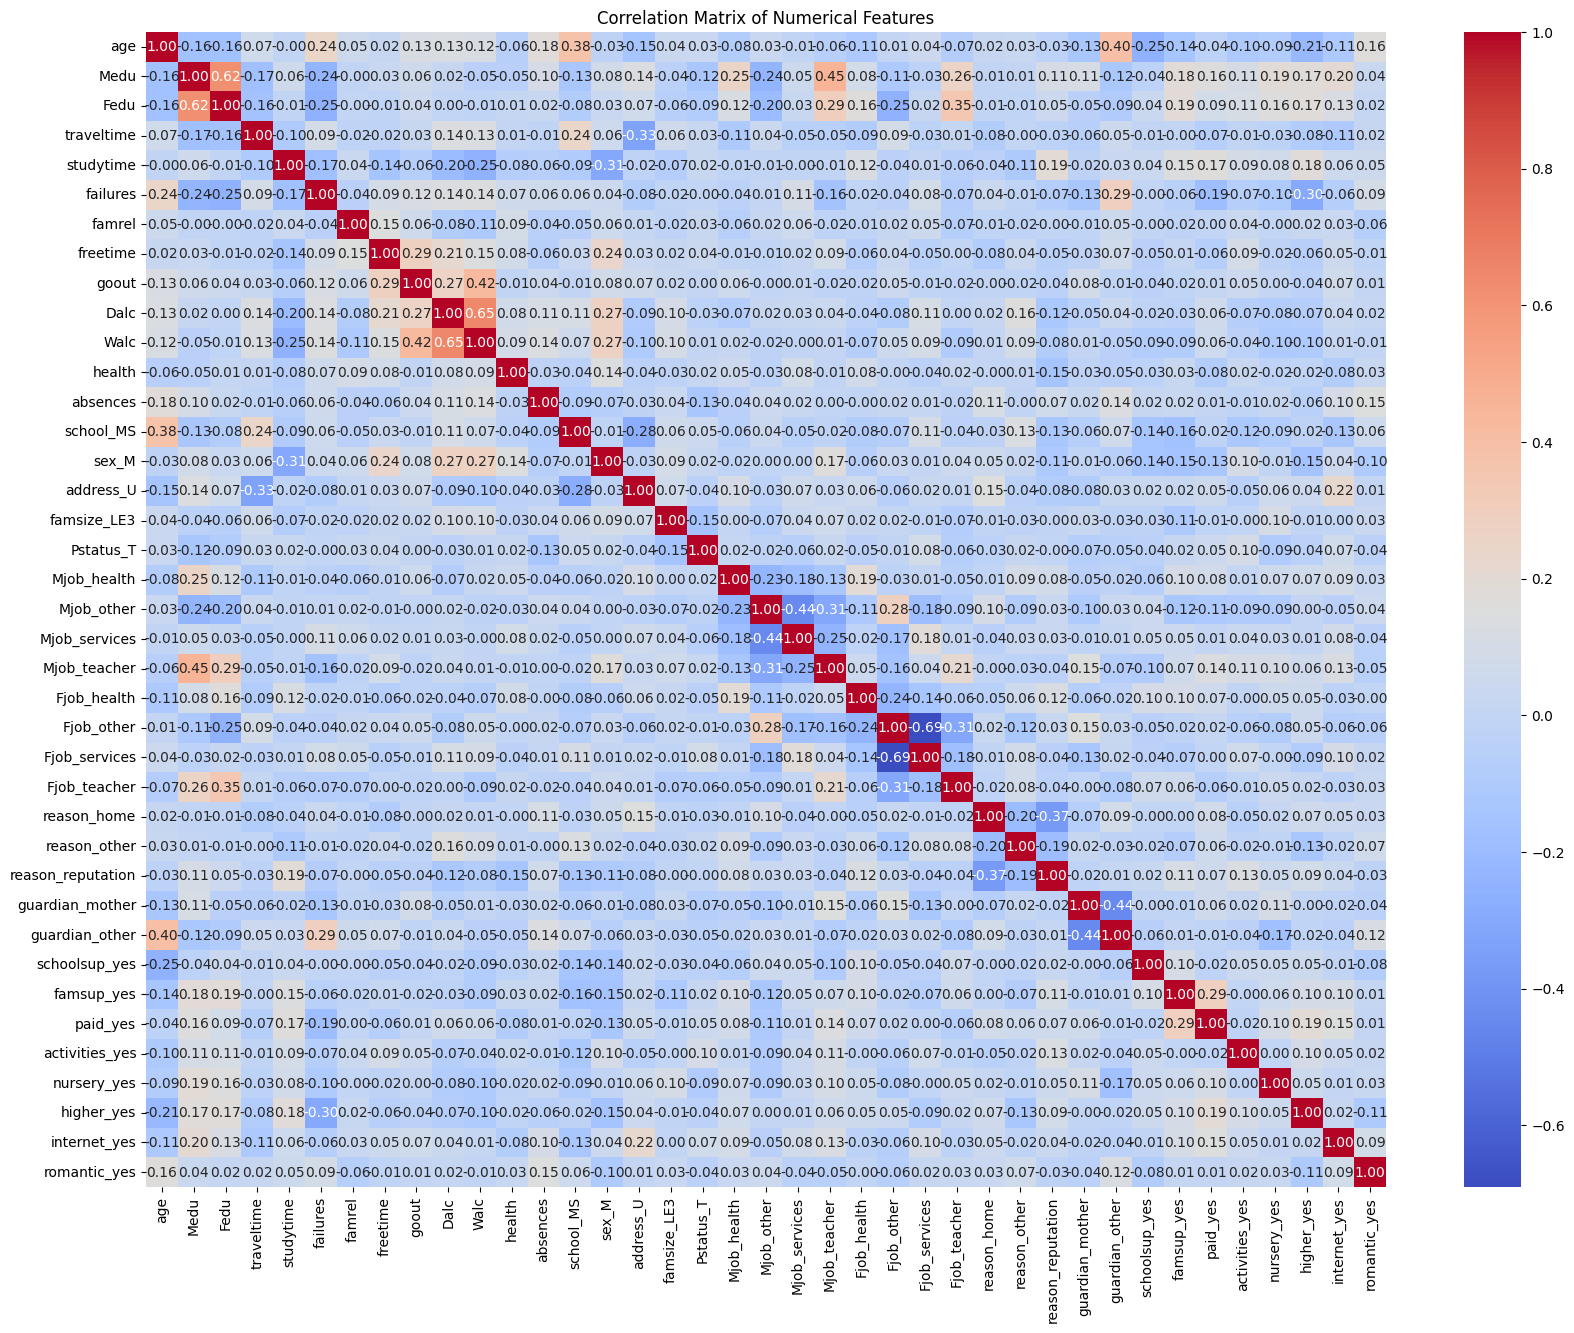

In [42]:
# Drop G1, G2, and G3 columns
selected_data = math_data_encoded.drop(columns=['G1', 'G2', 'G3'])
# Calculate correlation matrix for selected features
correlation_matrix = selected_data.corr()
# correlation matrix displated using seaborn heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## **Identifying and Removing Highly Correlated Features**

In [43]:
# Set the correlation threshold
threshold = 0.5

# Create an empty set to store the columns to be dropped
columns_to_drop = set()

# Iterate over the columns of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):  # Avoid checking the diagonal and duplicates
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            columns_to_drop.add(colname)

# Drop the highly correlated columns from your DataFrame
math_data_encoded = math_data_encoded.drop(columns=columns_to_drop)

In [44]:
math_data_encoded.shape

(395, 39)

In [45]:
math_data_encoded.head()

,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,health,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,2,2,0,4,3,4,1,3,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,2,0,5,3,3,1,3,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,2,3,4,3,2,2,3,...,1,0,1,0,1,0,1,1,1,0
3,15,4,1,3,0,3,2,2,1,5,...,1,0,0,1,1,1,1,1,1,1
4,16,3,1,2,0,4,3,2,1,5,...,0,0,0,1,1,0,1,1,0,0


In [46]:
math_data_encoded.columns

Index(['age', 'Medu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'health', 'absences', 'G1', 'G2', 'G3',
       'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

##**1. Distribution of Final Grades (G3)**

**Purpose**: To see the overall distribution of final math grades.

**Visualization**: Histogram

**Explanation**: This code uses seaborn.histplot to create a histogram of the 'G3' column. The kde=True argument adds a Kernel Density Estimate curve to show the distribution more smoothly.

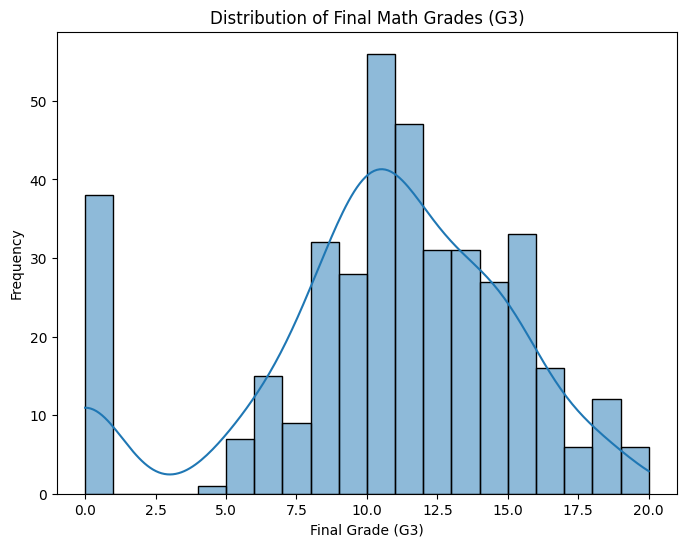

In [47]:
plt.figure(figsize=(8, 6))
sns.histplot(math_data_encoded['G3'], bins=20, kde=True)
plt.title('Distribution of Final Math Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

## **2. Relationship between Study Time and Final Grade**

**Purpose**: To explore if there's a correlation between weekly study time and final grades.

**Visualization**: Scatter plot

from this visualization it can be deduced that the number of times of weekly study doesn't really affect the final grade because the datapoints at each study time interval really look close in terms of spread.

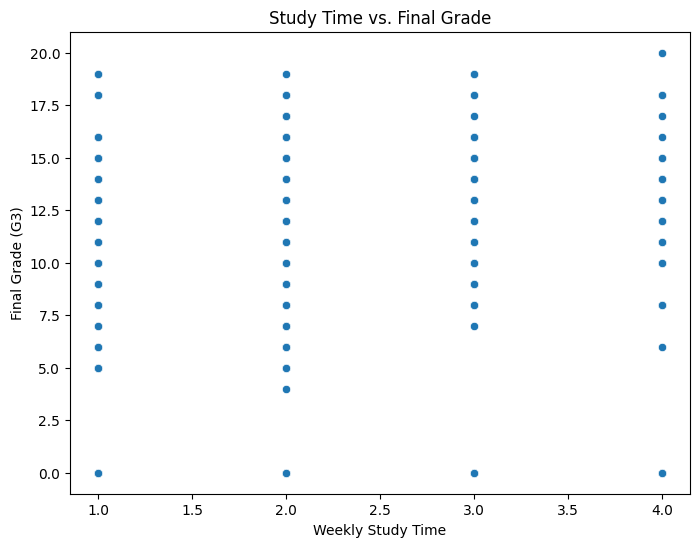

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='studytime', y='G3', data=math_data_encoded)
plt.title('Study Time vs. Final Grade')
plt.xlabel('Weekly Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

# **Spliting data set into training and test data**

In [49]:
# Define features (X) and target (y)
X = math_data_encoded.drop('G3', axis=1)
X = X.drop(columns=['G1', 'G2'])
Y = math_data_encoded['G3']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(355, 36) (40, 36) (355,) (40,)


# **1. Creating my Linear Regression Model**

In [50]:
# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

linear_rmse = root_mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression RMSE: {linear_rmse}")

Linear Regression RMSE: 3.907932829001478


## **Understanding the Actual vs. Predicted Plot to help draw model line for Linear Regression**

The Actual vs. Predicted plot is a valuable tool for visually assessing the performance of a Linear Regression model. It helps us understand how well the model's predictions align with the actual values of the target variable. since
it is very hard to visualize a straight line on 36 features(dimension) so this
was selected to make visualization easier.

**How it Works:**

1. **Data Points:** Each point on the plot represents a data point from the test set.
2. **X-axis:** Represents the actual values of the target variable (G3).
3. **Y-axis:** Represents the predicted values of the target variable, as generated by the model.
4. **Diagonal Line:** A diagonal line (y = x) is often added to the plot. This line represents perfect predictions, where the predicted values exactly match the actual values.

**Interpretation:**

* **Points Close to the Diagonal Line:** Indicate good predictions, meaning the model is accurately predicting the target variable for those data points.
* **Points Scattered Far from the Diagonal Line:** Represent larger errors in the predictions, suggesting the model is not performing as well for those data points.
* **Overall Pattern:** The overall pattern of the points can provide insights into the model's overall performance and potential biases. For example, if the points tend to be above the diagonal line for lower actual values and below the diagonal line for higher actual values, it might indicate that the model is underestimating higher values and overestimating lower values.

**Benefits of Using the Actual vs. Predicted Plot:**

* **Visual Assessment:** It provides a quick and intuitive way to visually assess the model's accuracy.
* **Identifying Potential Issues:** It can help identify potential problems with the model, such as systematic biases or areas where the model is performing poorly.
* **Comparing Models:** It can be used to compare the performance of different models by visually comparing their respective Actual vs. Predicted plots.

**Limitations:**

* **High Dimensionality:** It is difficult to use this plot for models with many features, as it becomes challenging to visualize the relationships in high-dimensional space.
* **Outliers:** Outliers can significantly influence the plot and might make it difficult to assess the overall performance of the model.

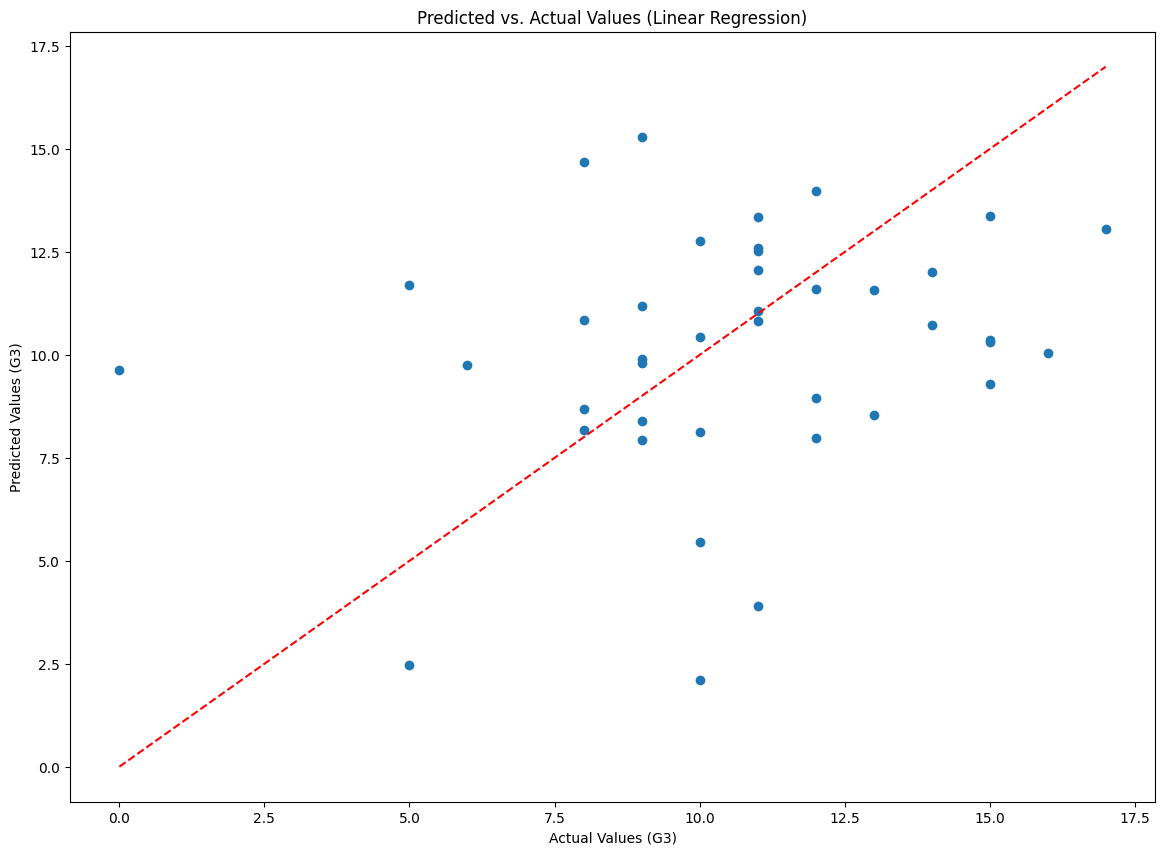

In [51]:
plt.figure(figsize=(14, 10))
plt.scatter(y_test, y_pred_linear)  # Actual values on x-axis, predicted values on y-axis
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title('Predicted vs. Actual Values (Linear Regression)')
plt.xlabel('Actual Values (G3)')
plt.ylabel('Predicted Values (G3)')
plt.show()

## **2. Creating my Decision Tree Model.**


In [52]:
decision_tree_model = DecisionTreeRegressor(
    max_depth=15,  # Limit the depth of the tree to prevent overfitting
    min_samples_split=15,  # Minimum number of samples required to split a node
    min_samples_leaf=10  # Minimum number of samples required at a leaf node
)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = decision_tree_model.predict(X_test)
tree_rmse = root_mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree RMSE: {tree_rmse}")

Decision Tree RMSE: 3.491761479384476


# **3. Creating my Random Forest Model**

In [53]:
# Create and train the Random Forest model
random_forest_model = RandomForestRegressor(
    n_estimators=17,  # Number of trees in the forest
    max_depth=10,  # Maximum depth of each tree
    min_samples_split=3,  # Minimum number of samples required to split a node
    min_samples_leaf=1,  # Minimum number of samples required at a leaf node
    random_state=35 # For reproducibility
)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model using RMSE
rf_rmse = root_mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest RMSE: {rf_rmse}")

Random Forest RMSE: 3.0020040248996764


## **Model Ranking**

In [54]:
# A dictionary to store the model names and their RMSE scores
model_scores = {
    "Linear Regression": linear_rmse,
    "Decision Tree": tree_rmse,
    "Random Forest": rf_rmse
}

# Sorting the models by RMSE scores in ascending order (least error first)
sorted_models = sorted(model_scores.items(), key=lambda item: item[1])

# Get the best model name and its RMSE score
best_model_name = sorted_models[0][0]
best_model_rmse = sorted_models[0][1]

print(f"\nBest Model: {best_model_name} (RMSE: {best_model_rmse})")

# Save the best model
if best_model_name == "Linear Regression":
    joblib.dump(linear_model, "best_model.pkl")
elif best_model_name == "Decision Tree":
    joblib.dump(decision_tree_model, "best_model.pkl")
elif best_model_name == "Random Forest":
    joblib.dump(random_forest_model, "best_model.pkl")

print("Best model saved as best_model.pkl")


Best Model: Random Forest (RMSE: 3.0020040248996764)
Best model saved as best_model.pkl


In [55]:
X_columns = X.columns.tolist()
# Save columns to a file
joblib.dump(X_columns, "X_train_columns.pkl")

['X_train_columns.pkl']

In [56]:
app = FastAPI()

# Add CORS middleware
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

metadata = [
    {
        "name": "school",
        "type": "str",
        "allowed_values": ["GP", "MS"],
        "description": "The school of the student. 'GP' for Gabriel Pereira and 'MS' for Mousinho da Silveira."
    },
    {
        "name": "sex",
        "type": "str",
        "allowed_values": ["F", "M"],
        "description": "The gender of the student. 'F' for female and 'M' for male."
    },
    {
        "name": "age",
        "type": "int",
        "range": [14, 22],
        "description": "The age of the student, ranging from 14 to 22 years old."
    },
    {
        "name": "address",
        "type": "str",
        "allowed_values": ["U", "R"],
        "description": "The type of location: 'U' for urban and 'R' for rural."
    },
    {
        "name": "famsize",
        "type": "str",
        "allowed_values": ["GT3", "LE3"],
        "description": "The size of the family: 'GT3' for greater than 3 members and 'LE3' for less than or equal to 3 members."
    },
    {
        "name": "Pstatus",
        "type": "str",
        "allowed_values": ["A", "T"],
        "description": "The parent's cohabitation status: 'A' for apart and 'T' for together."
    },
    {
        "name": "Medu",
        "type": "int",
        "allowed_values": [0, 1, 2, 3, 4],
        "description": "Mother's education level: 0 (none), 1 (primary education), 2 (5th-9th grade), 3 (secondary education), 4 (higher education)."
    },
    {
        "name": "Fedu",
        "type": "int",
        "allowed_values": [0, 1, 2, 3, 4],
        "description": "Father's education level: 0 (none), 1 (primary education), 2 (5th-9th grade), 3 (secondary education), 4 (higher education)."
    },
    {
        "name": "Mjob",
        "type": "str",
        "allowed_values": ["at_home", "health", "other", "services", "teacher"],
        "description": "Mother's job: 'at_home', 'health', 'other', 'services', 'teacher'."
    },
    {
        "name": "Fjob",
        "type": "str",
        "allowed_values": ["at_home", "health", "other", "services", "teacher"],
        "description": "Father's job: 'at_home', 'health', 'other', 'services', 'teacher'."
    },
    {
        "name": "reason",
        "type": "str",
        "allowed_values": ["course", "other", "home", "reputation"],
        "description": "Reason for choosing the school: 'course', 'other', 'home', 'reputation'."
    },
    {
        "name": "guardian",
        "type": "str",
        "allowed_values": ["mother", "father", "other"],
        "description": "Guardian of the student: 'mother', 'father', 'other'."
    },
    {
        "name": "traveltime",
        "type": "int",
        "range": [1, 5],
        "description": "Time taken to travel to school: 1 (less than 15 minutes), 2 (15-30 minutes), 3 (30 minutes to 1 hour), 4 (more than 1 hour)."
    },
    {
        "name": "studytime",
        "type": "int",
        "range": [1, 5],
        "description": "Weekly study time: 1 (<2 hours), 2 (2-5 hours), 3 (5-10 hours), 4 (>10 hours)."
    },
    {
        "name": "failures",
        "type": "int",
        "allowed_values": [0, 1, 2, 3],
        "description": "Number of past class failures: 0 (none), 1 (one failure), 2 (two failures), 3 (three or more failures)."
    },
    {
        "name": "schoolsup",
        "type": "str",
        "allowed_values": ["yes", "no"],
        "description": "Extra educational support: 'yes' or 'no'."
    },
    {
        "name": "famsup",
        "type": "str",
        "allowed_values": ["yes", "no"],
        "description": "Family educational support: 'yes' or 'no'."
    },
    {
        "name": "paid",
        "type": "str",
        "allowed_values": ["yes", "no"],
        "description": "Extra paid classes within the course subject: 'yes' or 'no'."
    },
    {
        "name": "activities",
        "type": "str",
        "allowed_values": ["yes", "no"],
        "description": "Participation in extra-curricular activities: 'yes' or 'no'."
    },
    {
        "name": "nursery",
        "type": "str",
        "allowed_values": ["yes", "no"],
        "description": "Attended nursery school: 'yes' or 'no'."
    },
    {
        "name": "higher",
        "type": "str",
        "allowed_values": ["yes", "no"],
        "description": "Wants to pursue higher education: 'yes' or 'no'."
    },
    {
        "name": "internet",
        "type": "str",
        "allowed_values": ["yes", "no"],
        "description": "Internet access at home: 'yes' or 'no'."
    },
    {
        "name": "romantic",
        "type": "str",
        "allowed_values": ["yes", "no"],
        "description": "In a romantic relationship: 'yes' or 'no'."
    },
    {
        "name": "famrel",
        "type": "int",
        "allowed_values": [1, 2, 3, 4, 5],
        "description": "Quality of family relationships (1 = very bad, 5 = excellent)."
    },
    {
        "name": "freetime",
        "type": "int",
        "allowed_values": [1, 2, 3, 4, 5],
        "description": "Free time after school (1 = very low, 5 = very high)."
    },
    {
        "name": "goout",
        "type": "int",
        "allowed_values": [1, 2, 3, 4, 5],
        "description": "Frequency of going out with friends (1 = very low, 5 = very high)."
    },
    {
        "name": "Dalc",
        "type": "int",
        "allowed_values": [1, 2, 3, 4, 5],
        "description": "Workday alcohol consumption (1 = very low, 5 = very high)."
    },
    {
        "name": "Walc",
        "type": "int",
        "allowed_values": [1, 2, 3, 4, 5],
        "description": "Weekend alcohol consumption (1 = very low, 5 = very high)."
    },
    {
        "name": "health",
        "type": "int",
        "allowed_values": [1, 2, 3, 4, 5],
        "description": "Current health status (1 = very bad, 5 = very good)."
    },
    {
        "name": "absences",
        "type": "int",
        "range": [0, 100],
        "description": "Number of school absences (0 to 100)."
    }
]

# Load the pre-trained model
model_path = "best_model.pkl"
best_model = joblib.load(model_path)

# Load the training data columns for alignment during one-hot encoding
X_path = "X_train_columns.pkl"
X_columns = joblib.load(X_path)

# Categorical columns for one-hot encoding
categorical_cols = [
    "school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob",
    "reason", "guardian", "schoolsup", "famsup", "paid", "activities",
    "nursery", "higher", "internet", "romantic"
]

# Constraints for validation
constraints = {
    "school": ["GP", "MS"],
    "sex": ["F", "M"],
    "age": (14, 22),
    "address": ["U", "R"],
    "famsize": ["GT3", "LE3"],
    "Pstatus": ["A", "T"],
    "Medu": [0, 1, 2, 3, 4],
    "Fedu": [0, 1, 2, 3, 4],
    "Mjob": ["at_home", "health", "other", "services", "teacher"],
    "Fjob": ["at_home", "health", "other", "services", "teacher"],
    "reason": ["course", "home", "other", "reputation"],
    "guardian": ["mother", "father", "other"],
    "traveltime": (1, 5),
    "studytime": (1, 5),
    "failures": [0, 1, 2, 3],
    "schoolsup": ["yes", "no"],
    "famsup": ["yes", "no"],
    "paid": ["yes", "no"],
    "activities": ["yes", "no"],
    "nursery": ["yes", "no"],
    "higher": ["yes", "no"],
    "internet": ["yes", "no"],
    "romantic": ["yes", "no"],
    "famrel": [1, 2, 3, 4, 5],
    "freetime": [1, 2, 3, 4, 5],
    "goout": [1, 2, 3, 4, 5],
    "Dalc": [1, 2, 3, 4, 5],
    "Walc": [1, 2, 3, 4, 5],
    "health": [1, 2, 3, 4, 5],
    "absences": (0, 100)
}

# Pydantic model for input data with validation
class StudentInput(BaseModel):
    school: str
    sex: str
    address: str
    famsize: str
    Pstatus: str
    Mjob: str
    Fjob: str
    reason: str
    guardian: str
    schoolsup: str
    famsup: str
    paid: str
    activities: str
    nursery: str
    higher: str
    internet: str
    romantic: str
    age: int = Field(..., ge=14, le=22)
    Medu: int = Field(..., ge=0, le=4)
    Fedu: int = Field(..., ge=0, le=4)
    traveltime: int = Field(..., ge=1, le=5)
    studytime: int = Field(..., ge=1, le=5)
    failures: int = Field(..., ge=0, le=3)
    famrel: int = Field(..., ge=1, le=5)
    freetime: int = Field(..., ge=1, le=5)
    goout: int = Field(..., ge=1, le=5)
    Dalc: int = Field(..., ge=1, le=5)
    Walc: int = Field(..., ge=1, le=5)
    health: int = Field(..., ge=1, le=5)
    absences: int = Field(..., ge=0, le=100)

    @model_validator(mode="before")
    def validate_constraints(cls, values):
        for key, value in values.items():
            if key in constraints:
                allowed_values = constraints[key]
                if isinstance(allowed_values, list) and value not in allowed_values:
                    raise ValueError(f"{key} must be one of {allowed_values}")
                elif isinstance(allowed_values, tuple) and not (allowed_values[0] <= value <= allowed_values[1]):
                    raise ValueError(f"{key} must be between {allowed_values[0]} and {allowed_values[1]}")
        return values

# Function to one-hot encode input data
def convert_input_to_binary(input_data, categorical_cols, X_columns):
    input_df = pd.DataFrame([input_data])  # Create a DataFrame from input data
    input_encoded = pd.get_dummies(input_df, columns=categorical_cols, drop_first=True)

    # Align with training data columns
    missing_cols = set(X_columns) - set(input_encoded.columns)
    for col in missing_cols:
        input_encoded[col] = 0

    input_encoded = input_encoded[X_columns]
    return input_encoded

@app.post("/predict")
def predict_grade(input_data: StudentInput):
    """
    Predict the student's final grade based on the input data.
    """
    try:
        # Convert input to dictionary and one-hot encode
        input_dict = input_data.dict()
        encoded_input = convert_input_to_binary(input_dict, categorical_cols, X_columns)

        # Predict using the best model
        prediction = best_model.predict(encoded_input)[0]

        return {"final_grade_prediction": prediction}
    except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))

@app.get("/columns")
def get_column_details():
    return {"columns": metadata}

# Run the app if the script is executed, cannot run fastapi on collab
# if __name__ == "__main__":
#     uvicorn.run(app, host="0.0.0.0", port=8000)


# CODE USED TO CONVERT PICKED CATEGORICAL VALUES OF PREDICTION APP

In [57]:
categorical_cols = [
    'school',
    'sex',
    'address',
    'famsize',
    'Pstatus',
    'Mjob',
    'Fjob',
    'reason',
    'guardian',
    'schoolsup',
    'famsup',
    'paid',
    'activities',
    'nursery',
    'higher',
    'internet',
    'romantic'
]

In [58]:
X.dtypes

,0
age,int64
Medu,int64
traveltime,int64
studytime,int64
failures,int64
famrel,int64
freetime,int64
goout,int64
Dalc,int64
health,int64


In [59]:
input_data = {
    'school': 'GP',
    'sex': 'F',
    'address': 'U',
    'famsize': 'GT3',
    'Pstatus': 'A',
    'Mjob': 'at_home',
    'Fjob': 'teacher',
    'reason': 'course',
    'guardian': 'mother',
    'schoolsup': 'yes',
    'famsup': 'no',
    'paid': 'no',
    'activities': 'no',
    'nursery': 'yes',
    'higher': 'yes',
    'internet': 'no',
    'romantic': 'no',
    'age': 16,
    'Medu': 4,
    'Fedu': 4,
    'traveltime': 2,
    'studytime': 2,
    'failures': 0,
    'famrel': 4,
    'freetime': 3,
    'goout': 3,
    'Dalc': 1,
    'Walc': 1,
    'health': 5,
    'absences': 0
}

In [60]:
def convert_input_to_binary(input_data, categorical_cols, X):
    """Converts categorical input to binary values based on one-hot encoding."""

    input_df = pd.DataFrame([input_data])  # Create a DataFrame from input data

    # One-hot encode the input DataFrame
    input_encoded = pd.get_dummies(input_df, columns=categorical_cols, drop_first=True)

    # Align columns with the training data
    missing_cols = set(X.columns) - set(input_encoded.columns)
    for col in missing_cols:
        input_encoded[col] = 0  # Add missing columns and set to 0

    # Remove extra columns
    extra_cols = set(input_encoded.columns) - set(X.columns)
    input_encoded = input_encoded.drop(columns=list(extra_cols),axis=1)
    input_encoded = input_encoded[[c for c in X.columns if c in input_encoded.columns]]

    return input_encoded

In [61]:
categorical_input_encoded = convert_input_to_binary(input_data, categorical_cols, X)
# Combine numerical and categorical features
all_features = pd.DataFrame(categorical_input_encoded)

In [62]:
prediction = linear_model.predict(all_features)
prediction_1 = decision_tree_model.predict(all_features)
prediction_2 = random_forest_model.predict(all_features)
print(f"Linear model Predicted G3: {prediction[0]}")
print(f"Decision tree model Predicted G3: {prediction_1[0]}")
print(f"Random Forest model Predicted G3: {prediction_2[0]}")

Linear model Predicted G3: 9.68382641405405
Decision tree model Predicted G3: 11.6
Random Forest model Predicted G3: 7.25650623885918
